# Figure 3

All plots in the manuscript are done with DPI = 600. In the jupyter notebook I changed it to *200*


# Packages required

Run it all at the same time to get the plots # Packages

In [21]:
 
from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from lmfit import Parameters, minimize, Model, report_fit, conf_interval
from sklearn.metrics import mean_squared_error
import numdifftools
from PIL import Image
from sklearn.metrics import r2_score
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import scipy.optimize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
import scipy.stats as st
from scipy.stats import scoreatpercentile



import glob


# Asthetics

In [22]:
colors = [  "#56B4E9", "#009E73", "#CC79A7", "#999999", "#E69F00","#DB2B39", "#0076A1", "#0072B2", "#1A5042","#0C1713", "#6A6969"]
palette = sns.color_palette(colors)
n = 1

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.3, 
              rc={"lines.linewidth": n, 'axes.linewidth':n, 
                                  "xtick.major.width":n,"ytick.major.width":n}, 
              palette = palette)
sns.color_palette(colors)

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.6, 0.6, 0.6),
 (0.9019607843137255, 0.6235294117647059, 0.0),
 (0.8588235294117647, 0.16862745098039217, 0.2235294117647059),
 (0.0, 0.4627450980392157, 0.6313725490196078),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.10196078431372549, 0.3137254901960784, 0.25882352941176473),
 (0.047058823529411764, 0.09019607843137255, 0.07450980392156863),
 (0.41568627450980394, 0.4117647058823529, 0.4117647058823529)]

# Figure 3C

In [23]:
c = pd.read_csv("Figure3C_Lifetime.csv")

/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_3364/3287570971.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(yticks = np.linspace(0, 30, 3), xlabel = "", ylabel = "", xticklabels=[""])


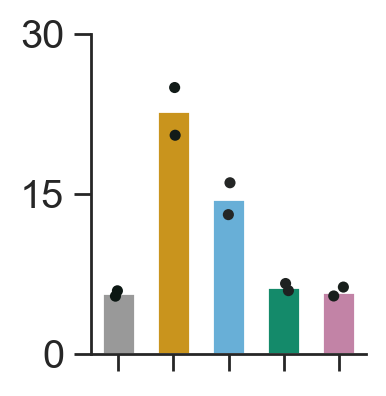

In [24]:
fig, ax = plt.subplots(figsize = (2.2,2.25), dpi = 200)
o = ['kArg-kArg-Control',
 'kArg-kArg-Click',
 'Arg-Arg-Click',
 'Gly-Gly-Click',
 'Cys-Cys-Click']

sns.stripplot(data = c, x = "C", y = "Lt", 
              palette='dark:#0C1713', legend=False, ax = ax, hue = "C", s = 4,
              dodge=None, order=o)

 
sns.barplot(data = c, x = "C", y = "Lt", order=o,
             hue = "C", 
             legend=False, 
             ax = ax, 
             dodge=None, 
             errorbar=None,  width=.6, palette = ["C3", "C4", "C0", "C1", "C2"], hue_order=o) 
ax.set(yticks = np.linspace(0, 30, 3), xlabel = "", ylabel = "", xticklabels=[""])

sns.despine()
plt.tight_layout()

# Figure 3A

In [25]:
a = pd.read_csv("Figure3B_Data.csv")
a

,Time,Azide_1,Azide_2,Type,value
0,0.000000,kArg,kArg,Click,1.7874
1,0.150000,kArg,kArg,Click,1.9044
2,0.316667,kArg,kArg,Click,1.9223
3,0.483333,kArg,kArg,Click,1.9211
4,0.650000,kArg,kArg,Click,1.9155
...,...,...,...,...,...
489,9.383333,kArg,kArg,Control,0.0181
490,9.550000,kArg,kArg,Control,0.0182
491,9.716667,kArg,kArg,Control,0.0182
492,9.883333,kArg,kArg,Control,0.0182


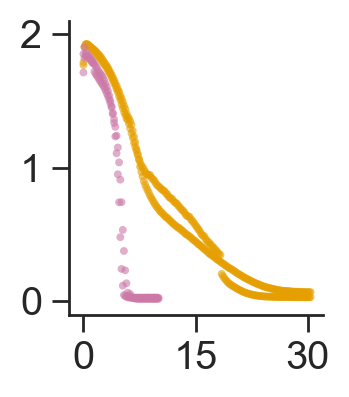

In [26]:
fig, ax = plt.subplots(figsize = (2.,2.25), dpi = 200)

sns.scatterplot(data = a.query("Type == 'Click'")
                , x = "Time", y = "value", ax = ax, 
                color = "C4", edgecolor = "none", s = 8, alpha = .6)


sns.scatterplot(data = a.query("Type == 'Control'")
                , x = "Time", y = "value", ax = ax, 
                color = "C2", edgecolor = "none", s = 8, alpha = .6)





sns.despine(fig, left=False, bottom=False)
ax.set(xlabel = "", ylabel = "", xticks = np.linspace(0, 30, 3), yticks = np.linspace(0, 2, 3), ylim = (-0.1, 2.1),xlim =  (-2, 32))

plt.tight_layout()

# Figure 3G

In [27]:
g = pd.read_csv("Figure3G_Data.csv")


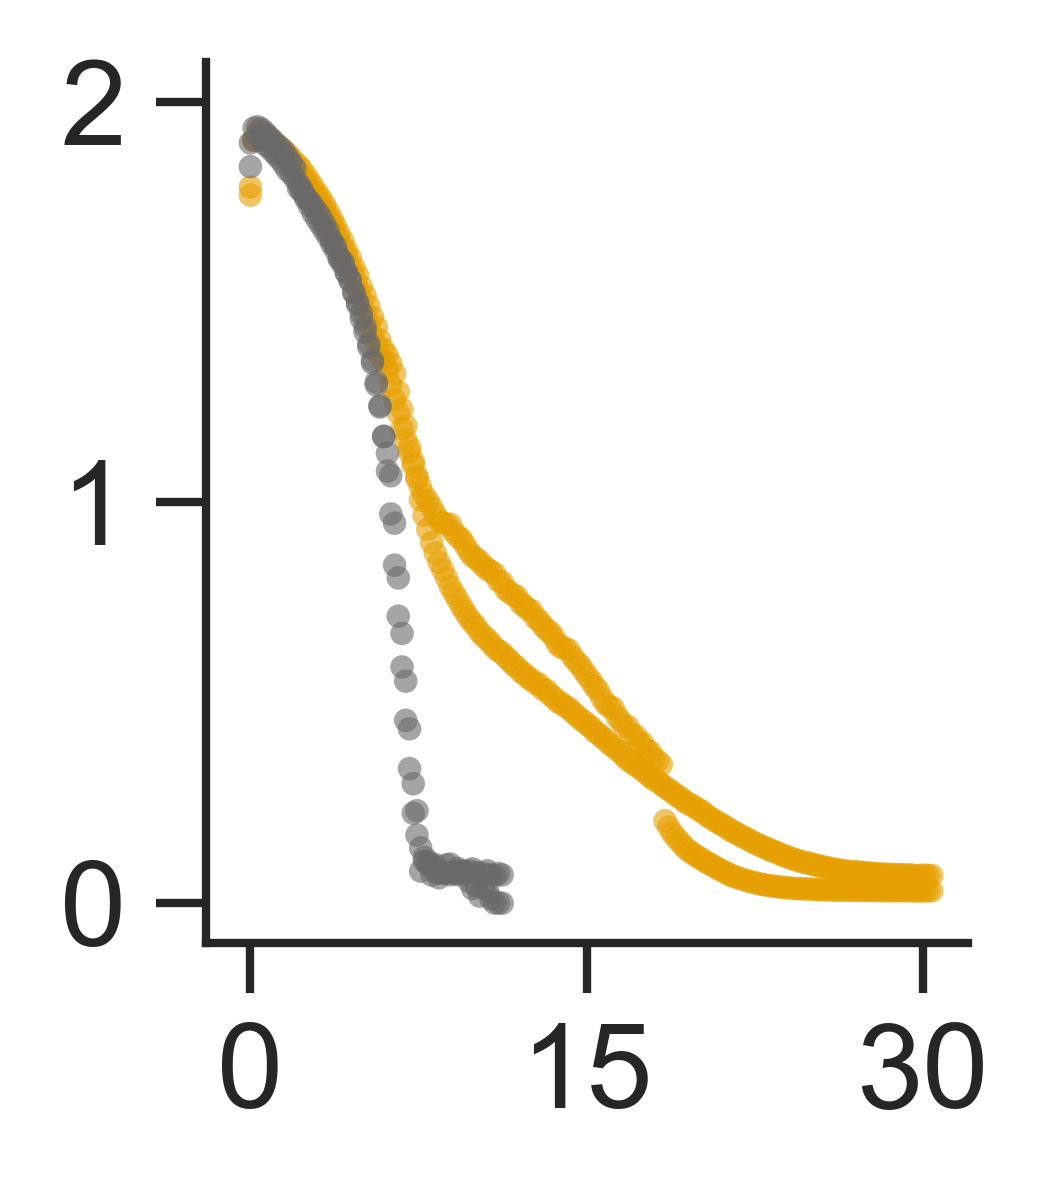

In [28]:
fig, ax = plt.subplots(figsize = (2.,2.25), dpi = 600)

sns.scatterplot(data = g.query("Type == 'Click'")
                , x = "Time", y = "value", ax = ax, 
                color = "C4", edgecolor = "none", s = 8, alpha = .6)


sns.scatterplot(data = g.query("Type == 'pClick'")
                , x = "Time", y = "value", ax = ax, 
                color = "C10", edgecolor = "none", s = 8, alpha = .6)


sns.despine(fig, left=False, bottom=False)
ax.set(xlabel = "", ylabel = "", xticks = np.linspace(0, 30, 3), yticks = np.linspace(0, 2, 3), ylim = (-0.1, 2.1),xlim =  (-2, 32))

plt.tight_layout()

# Figure 3H

In [29]:
df0 = pd.read_csv("Figure3H_insitu.csv")
f0 = pd.read_csv("Figure3H_insitu_fit.csv")

df1 = pd.read_csv("Figure3H_exsitu.csv")
f1 = pd.read_csv("Figure3H_exsitu_fit.csv")


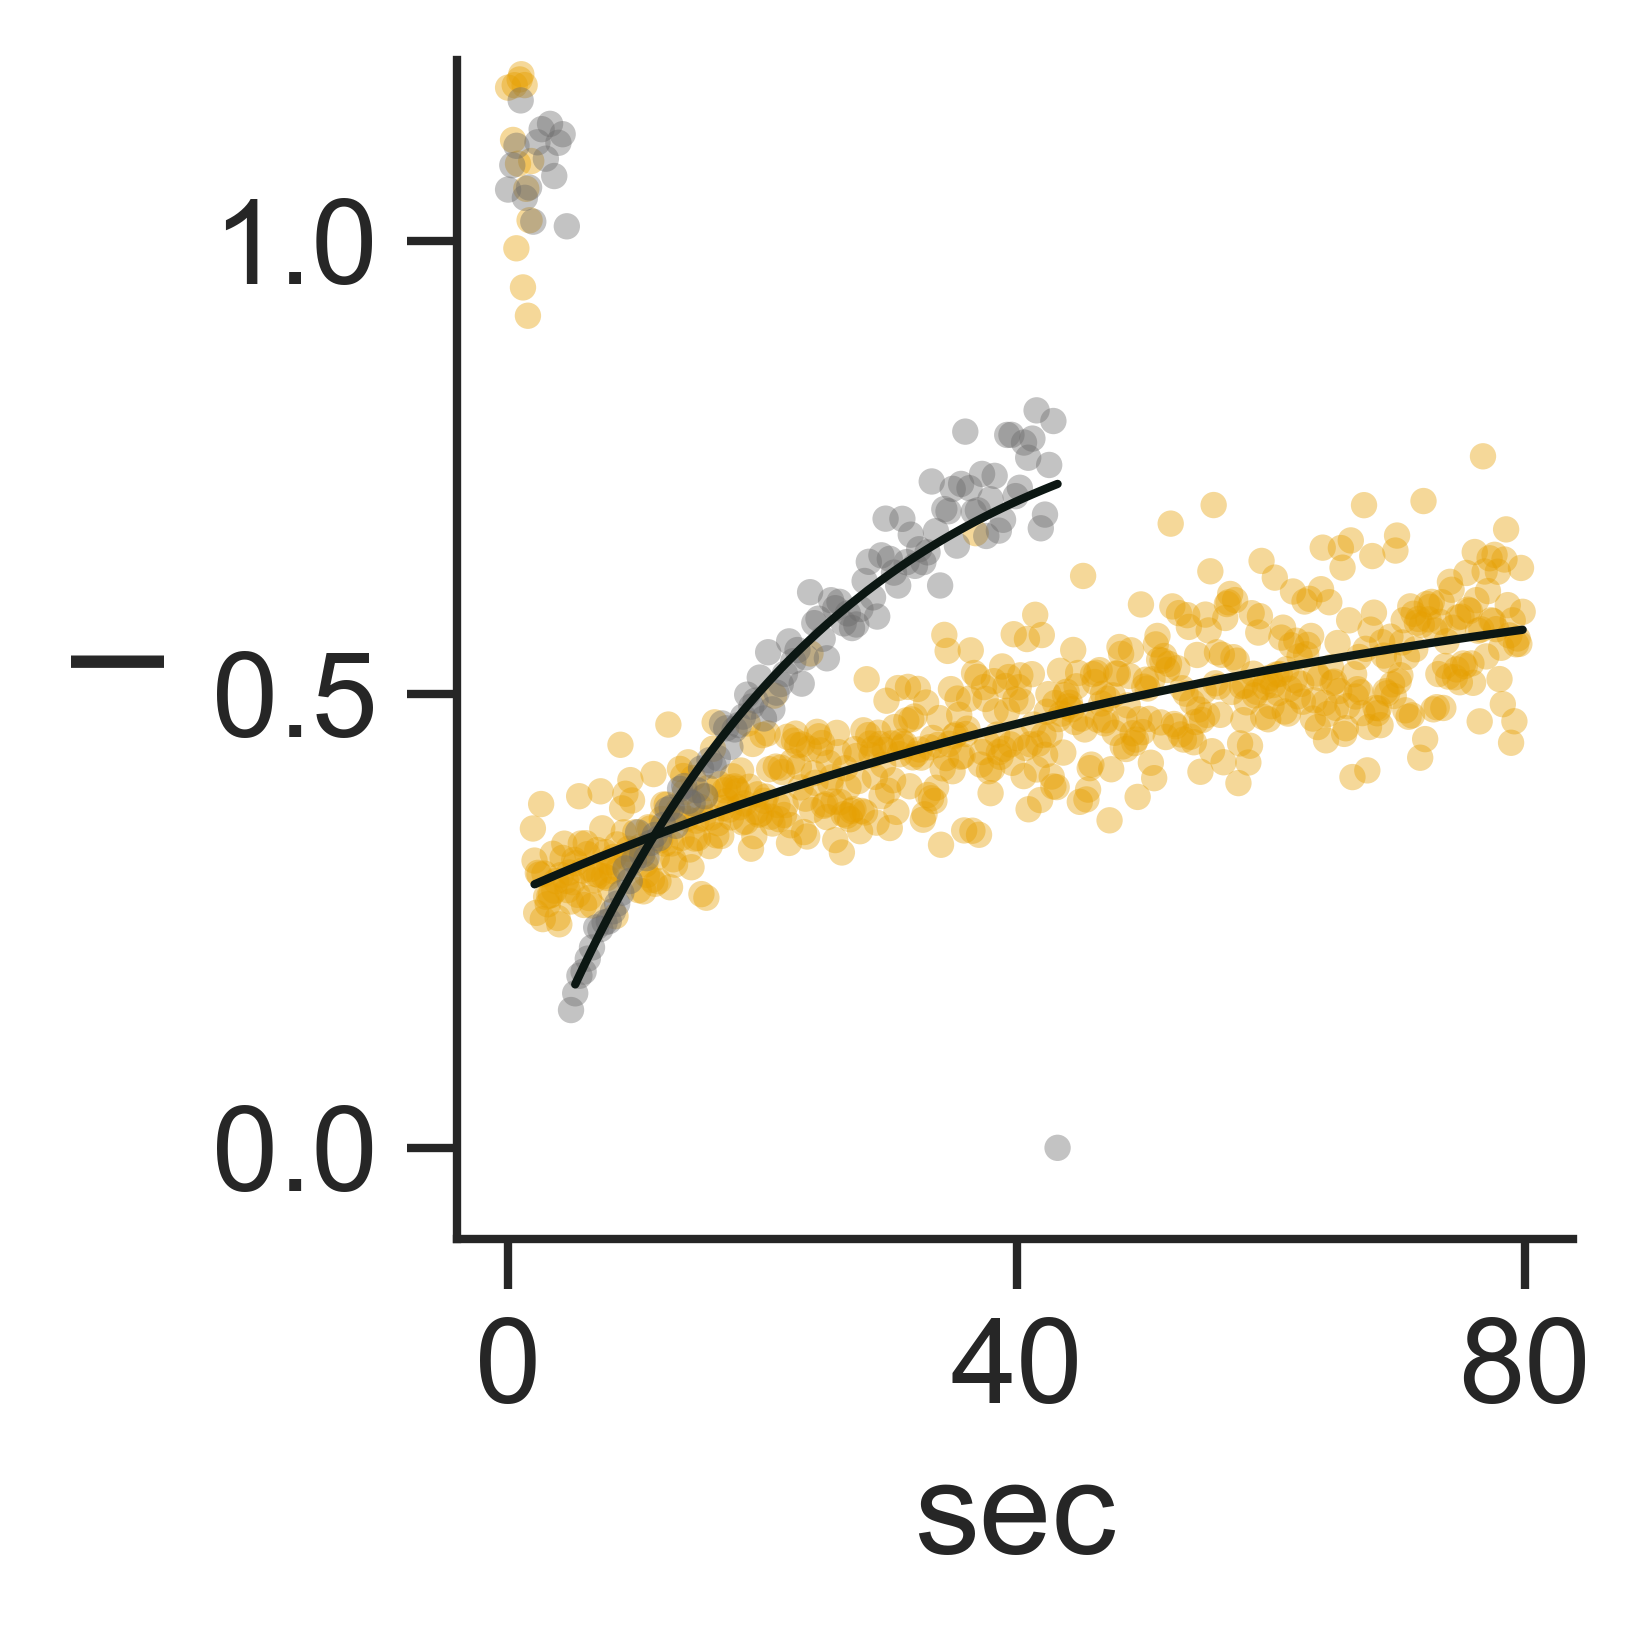

In [30]:
fig, axs = plt.subplots(figsize=(3, 3), dpi = 600)

# ==== in situ ====
sns.scatterplot(data = df0, x = "sec", y = "I", alpha = 0.4, lw = 0, s = 10, edgecolor="none", color = "C4")
sns.lineplot(data = f0, x = "sec", y = "fit_I", color = "C9")

# ==== ex situ ====
sns.scatterplot(data = df1, x = "sec", y = "I", alpha = 0.4, lw = 0, s = 10, edgecolor="none", color = "C10")
sns.lineplot(data = f1, x = "sec", y = "fit_I", color = "C9")

# ==== Asthetics ====

axs.set(xticks=np.linspace(0, 80, 3), yticks=np.linspace(0, 1, 3), ylim = (-0.1, 1.2))

#axs.axhline( y = 1, c = "C9", lw = .5, ls = "dotted")
sns.despine(fig, top = True, right = True)
plt.tight_layout()

In [31]:
r0 = pd.read_csv("Figure3H_insitu_fit_parameters.csv")
r1 = pd.read_csv("Figure3H_exsitu_fit_parameters.csv")

In [32]:
R = pd.concat((r0, r1), axis = 0)
R = R.reset_index(drop=True)    
R["Ref"] = sorted(["00_in situ", "01_ex situ droplets"]*5)
R["Value"] = R["Value"].apply(lambda x: "{:.4f}".format(x))
R = R.drop(columns=R.columns[0:2]) # I remove the first two columns because they are unnamed and not needed
R

,Parameter,Value,Ref
0,A (Mobile Fraction),0.4208,00_in situ
1,Tau (s),66.7032,00_in situ
2,Offset C,0.2777,00_in situ
3,Half-time t1/2 (s),46.2352,00_in situ
4,Diffusion D (µm²/s),0.0194,00_in situ
5,A (Mobile Fraction),0.8555,01_ex situ droplets
6,Tau (s),22.3169,01_ex situ droplets
7,Offset C,0.0000,01_ex situ droplets
8,Half-time t1/2 (s),15.4689,01_ex situ droplets
9,Diffusion D (µm²/s),0.0579,01_ex situ droplets
